### 0.import

In [3]:
path = './kakao_arena_melon/res/'

In [4]:
import pandas as pd
train = pd.read_json(path + 'train.json', typ = 'frame')

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. 플레이리스트 별 tags의 수와 플레이리스트의 좋아요 수 like_cnt의 상관관계

- tag 수가 많으면 유저들에게 선택될 경우가 많아 좋아요 수가 많을 것으로 예상했으나, 두 변수 간의 상관관계는 없는 것으로 보임.

In [6]:
train['tags_cnt']=train['tags'].apply(lambda x:len(x))

In [7]:
train.corr() #tag 수가 많으면 유저들에게 선택될 경우가 많아 좋아요 수가 많을 것으로 예상했으나, 두 변수 간의 상관관계는 없는 것으로 보임.

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5420\110711992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr() #tag 수가 많으면 유저들에게 선택될 경우가 많아 좋아요 수가 많을 것으로 예상했으나, 두 변수 간의 상관관계는 없는 것으로 보임.


,id,like_cnt,tags_cnt
id,1.000000,-0.002264,0.003854
like_cnt,-0.002264,1.000000,0.066963
tags_cnt,0.003854,0.066963,1.000000


### 2. songs_cnt(플레이리스트 내 노래의 수)와 플레이리스트 like_cnt의 상관관계

- songs_cnt와 좋아요 수의 상관계수는 0.15로 상관관계가 없음

In [8]:
train['songs_cnt']=train['songs'].apply(lambda x:len(x))

In [9]:
train.corr() #songs_cnt와 좋아요 수의 상관관계 수는 0.15로 상관관계가 없음

C:\Users\Playdata\AppData\Local\Temp\ipykernel_5420\451745694.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr() #songs_cnt와 좋아요 수의 상관관계 수는 0.15로 상관관계가 없음


,id,like_cnt,tags_cnt,songs_cnt
id,1.000000,-0.002264,0.003854,-0.003630
like_cnt,-0.002264,1.000000,0.066963,0.149828
tags_cnt,0.003854,0.066963,1.000000,0.063051
songs_cnt,-0.003630,0.149828,0.063051,1.000000


### 3.전체 songs 중 song 별 플레이리스트에 사용된 횟수
- song 유니크 갯수:615142
- 한 song 당 평균 8.6번 train set에 등장
- 한 song 당 최소 1번 train set에 등장
- 한 song 당 최대 2175번 train set에 등장
- 특정 song들만 많이 쓰임

In [10]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,tags_cnt,songs_cnt
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,1,19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,2,42
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,2,28
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,10,38
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,1,53


In [11]:
from collections import Counter

all_sogs = [song for sublist in train['songs'] for song in sublist]

all_sogs
song_counts = Counter(all_sogs)
song_counts_df = pd.DataFrame.from_dict(song_counts, orient='index', columns=['등장횟수'])

# 인덱스의 이름 설정
song_counts_df.index.name = 'song'
song_counts_df

,등장횟수
song,
525514,7
129701,3
383374,1
562083,15
297861,57
...,...
57503,1
74465,1
521769,1


In [12]:
song_counts_df.describe()

,등장횟수
count,615142.000000
mean,8.592928
std,39.481912
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,2175.000000


### 4. 전체 tags 중 tag 등장 횟수
- tag 유니크 갯수:29160
- 한 tag 당 평균 16번 train set에 등장
- 한 tag 당 최소 1번 train set에 등장
- 특정 tag들만 많이 쓰임

In [13]:
all_tag = [tag for sublist in train['tags'] for tag in sublist]

all_tag
tag_counts = Counter(all_tag)
tag_counts_df = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['등장횟수'])

# 인덱스의 이름 설정
tag_counts_df.index.name = 'tag'
tag_counts_df

,등장횟수
tag,
락,4007
추억,6520
회상,4579
까페,2856
잔잔한,10218
...,...
사랑하고있을때,1
우울해지고싶을때듣는노래,1
gershwin,1


In [14]:
tag_counts_df.describe() 
                         

,등장횟수
count,29160.000000
mean,16.335082
std,247.011075
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,16465.000000


### 5. tag 별 like_cnt 갯수 확인
- tags 유니크 갯수      : 29160 
- tag 별 평균 좋아요 수 : 2010
- tag 별 최소 좋아요 수 : 0 -> 1,200개(전체 중 4%)
- tag 별 중앙값 좋아요  : 25개
- tag 25% 좋아요 수     : 7개
  
- tag 별 좋아요가 10개 이하인 태그들이 전체 33% 정도임 
- tag 별 좋아요가 ?개 있는 것부터 봐도 괜찮을 듯   
    -> 실제 모델링을 해보면서 조절하는게 좋을 듯

In [16]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,tags_cnt,songs_cnt
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,1,19
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,2,42
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,2,28
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,10,38
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,1,53


In [17]:
# tags와 likecnt만 담기
tags_likecnt = train[['tags', 'like_cnt']]
tags_likecnt.head()

,tags,like_cnt
0,[락],71
1,"[추억, 회상]",1
2,"[까페, 잔잔한]",17
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",33
4,[댄스],9


In [18]:
# tags열 분해하기
tags_plylst_title_unnest = np.dstack(
    (
        np.repeat(tags_likecnt.like_cnt.values, list(map(len, tags_likecnt.tags))), 
        np.concatenate(tags_likecnt.tags.values)
    )
)
tags_likecnt_df = pd.DataFrame(tags_plylst_title_unnest[0]) # dataframe으로 만들기
tags_likecnt_df.columns = ['like_cnt', 'tags']
tags_likecnt_df = tags_likecnt_df[['tags', 'like_cnt']] # 컬럼 순서 바꾸기
tags_likecnt_df['like_cnt'] = tags_likecnt_df['like_cnt'].astype(int) # like_cnt type바꾸기
tags_likecnt_df
# 476331행

,tags,like_cnt
0,락,71
1,추억,1
2,회상,1
3,까페,17
4,잔잔한,17
...,...,...
476326,퇴근길,4
476327,노래추천,17
476328,팝송추천,17
476329,팝송,17


In [19]:
tags_likecnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476331 entries, 0 to 476330
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tags      476331 non-null  object
 1   like_cnt  476331 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 5.5+ MB


In [20]:
# tag별 like_cnt(플레이리스트 좋아요 수) 확인
tags_likecnt_df = pd.DataFrame(tags_likecnt_df.groupby('tags').sum()).reset_index().sort_values('like_cnt', ascending=False)
tags_likecnt_df

,tags,like_cnt
7065,기분전환,2253288
9839,드라이브,1765486
5234,감성,1308743
26439,팝,1275754
28675,휴식,1177176
...,...,...
17736,아이엠,0
20280,우주대스타,0
9385,더이스트라이트,0
3051,SteveLillywhite,0


In [21]:
tags_likecnt_df[tags_likecnt_df['like_cnt'] <= 10] # 9745개
9745 /29160*100

33.41906721536351

In [22]:
len(tags_likecnt_df['like_cnt'].unique())

3054

In [23]:
tags_likecnt_df.describe()

# tags 유니크 갯수      : 29160 
# tag 별 평균 좋아요 수 : 2010
# tag 별 최소 좋아요 수 : 0 -> 1,200개(전체 중 4%)
# tag 별 중앙값 좋아요  : 25개
# tag 25% 좋아요 수     : 7개
# tag 별 좋아요가 ?개 있는 것부터 봐도 괜찮을 듯

,like_cnt
count,2.916000e+04
mean,2.010221e+03
std,3.131825e+04
min,0.000000e+00
25%,7.000000e+00
50%,2.500000e+01
75%,1.510000e+02
max,2.253288e+06


In [24]:
tmp_df = pd.DataFrame(tags_likecnt_df['like_cnt'].value_counts())
tmp_df = tmp_df.reset_index()
tmp_df

,index,like_cnt
0,1,1217
1,0,1200
2,4,1073
3,2,1057
4,3,996
...,...,...
3049,4202,1
3050,4195,1
3051,4191,1
3052,4186,1


In [25]:
tmp_df_likecnt = tmp_df.sort_values('like_cnt', ascending=True)
tmp_df_likecnt

,index,like_cnt
1526,1369,1
2030,61738,1
2031,52107,1
2032,60925,1
2033,60066,1
...,...,...
4,3,996
3,2,1057
2,4,1073
1,0,1200


### 6. tag 별 plylst 이름확인하기
- 공란 tag 1개 존재
- 인기 tag TOP20 : '기분전환','감성', '휴식', '발라드', '잔잔한', '드라이브', '힐링', '사랑', '새벽', '밤', '카페', '추억', '팝', '힙합', '이별', '설렘', '신나는', '회상', '매장음악', '여행' 

In [ ]:
train = pd.read_json('./kakao_arena_melon/res/train.json', typ = 'frame')
tags_plylst_title = train[['tags', 'plylst_title']]
tags_plylst_title.head()

,tags,plylst_title
0,[락],여행같은 음악
1,"[추억, 회상]",요즘 너 말야
2,"[까페, 잔잔한]","편하게, 잔잔하게 들을 수 있는 곡.-"
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",크리스마스 분위기에 흠뻑 취하고 싶을때
4,[댄스],추억의 노래 ㅋ


In [ ]:
tags_plylst_title_unnest = np.dstack(
    (
        np.repeat(tags_plylst_title.plylst_title.values, list(map(len, tags_plylst_title.tags))), 
        np.concatenate(tags_plylst_title.tags.values)
    )
)

tags_plylst_title_map = pd.DataFrame(tags_plylst_title_unnest[0])
tags_plylst_title_map.columns
tags_plylst_title_map.columns = ['plylst_title', 'tags']
tags_plylst_title_map.head()

,plylst_title,tags
0,여행같은 음악,락
1,요즘 너 말야,추억
2,요즘 너 말야,회상
3,"편하게, 잔잔하게 들을 수 있는 곡.-",까페
4,"편하게, 잔잔하게 들을 수 있는 곡.-",잔잔한


In [ ]:
tags_plylst_title_map = tags_plylst_title_map.groupby('tags').plylst_title.apply(list).reset_index()
tags_plylst_title_map

,tags,plylst_title
0,,[어떻게 떴냐고? 답은 바로 TikTok!]
1,00,"[I LOVE 2000s POP, 추억소환,신나는 댄스음악, Now and then..."
2,007,"[007 제임스 본드 테마 음악 스페셜, 긴장감 넘치는 액션과 사운드! 첩보 스파이..."
3,007시리즈,"[당대 최고 가수들이 부른 007 주제곡, 클래식한 스파이 액션의 대표주자, 007..."
4,00s,"[그때가 좋았지....좋았던 기억이 떠오르는 플레이리스트, Untitled, 00년..."
...,...,...
29155,힙해,"[남다른 SOUND를 선보이는 국내 HIPHOP ~, 요즘 가장 핫한 2인조 프로듀..."
29156,힙힙힙,"[겨울에도 힙하게! 얼죽힙! 뉴트로한 뮤지션 모음집, 달달힙한노래 모음]"
29157,힛뎀포크,[●요즘 힙클 대세 Hit Them Folks를 아시나요?]
29158,힛뎀폭,[●요즘 힙클 대세 Hit Them Folks를 아시나요?]


In [ ]:
type(tags_plylst_title_map['plylst_title'][0])

list

In [ ]:
tags_plylst_title_map.to_csv('./new_data/tags_plylst.csv', index=False)

In [ ]:
tags_plylst_title_map = pd.read_csv('./new_data/tags_plylst.csv')
tags_plylst_title_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29160 entries, 0 to 29159
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          29159 non-null  object
 1   plylst_title  29160 non-null  object
dtypes: object(2)
memory usage: 455.8+ KB


In [ ]:
type(tags_plylst_title_map['plylst_title'][0]) # str
tags_plylst_title_map['plylst_title'] = tags_plylst_title_map['plylst_title'].apply(lambda x : ast.literal_eval(x))
type(tags_plylst_title_map['plylst_title'][0]) # list

list

In [ ]:
tags_plylst_title_map['plylst_title_num'] = tags_plylst_title_map['plylst_title'].apply(lambda x : len(x))
tags_plylst_title_map

,tags,plylst_title,plylst_title_num
0,NaN,[어떻게 떴냐고? 답은 바로 TikTok!],1
1,00,"[I LOVE 2000s POP, 추억소환,신나는 댄스음악, Now and then...",4
2,007,"[007 제임스 본드 테마 음악 스페셜, 긴장감 넘치는 액션과 사운드! 첩보 스파이...",3
3,007시리즈,"[당대 최고 가수들이 부른 007 주제곡, 클래식한 스파이 액션의 대표주자, 007...",2
4,00s,"[그때가 좋았지....좋았던 기억이 떠오르는 플레이리스트, Untitled, 00년...",3
...,...,...,...
29155,힙해,"[남다른 SOUND를 선보이는 국내 HIPHOP ~, 요즘 가장 핫한 2인조 프로듀...",5
29156,힙힙힙,"[겨울에도 힙하게! 얼죽힙! 뉴트로한 뮤지션 모음집, 달달힙한노래 모음]",2
29157,힛뎀포크,[●요즘 힙클 대세 Hit Them Folks를 아시나요?],1
29158,힛뎀폭,[●요즘 힙클 대세 Hit Them Folks를 아시나요?],1


In [ ]:
tags_plylst_title_map = tags_plylst_title_map.sort_values('plylst_title_num', ascending=False)

In [ ]:
tags_plylst_title_map.to_csv('./new_data/tags_plylst.csv', index=False)
tags_plylst_title_map = pd.read_csv('./new_data/tags_plylst.csv')
tags_plylst_title_map.head()

,tags,plylst_title,plylst_title_num
0,기분전환,"['2017 Pop Trend', '노래로 의지를 불태우자! ""1일1다짐"" st용 ...",16465
1,감성,"['나만 알고싶은 노래들', '지친 하루 끝, 힐링이 필요한 당신에게 추천하는 인디...",11417
2,휴식,"['여행가는 길 이런음악과 함께 고고씽!!!', '8~90년대 우리나라 라디오에서 ...",11215
3,발라드,"['발라드로 감성을 발라드림(슬픔주의)', '이별 후 당신의 마음을 울리는 노래',...",10796
4,잔잔한,"['편하게, 잔잔하게 들을 수 있는 곡.-', '멍청이.. 내맘도 몰라.', 'ᴡʜ...",10218


In [ ]:
tmp = tags_plylst_title_map[:20]
list(tmp['tags'])

['기분전환',
 '감성',
 '휴식',
 '발라드',
 '잔잔한',
 '드라이브',
 '힐링',
 '사랑',
 '새벽',
 '밤',
 '카페',
 '추억',
 '팝',
 '힙합',
 '이별',
 '설렘',
 '신나는',
 '회상',
 '매장음악',
 '여행']

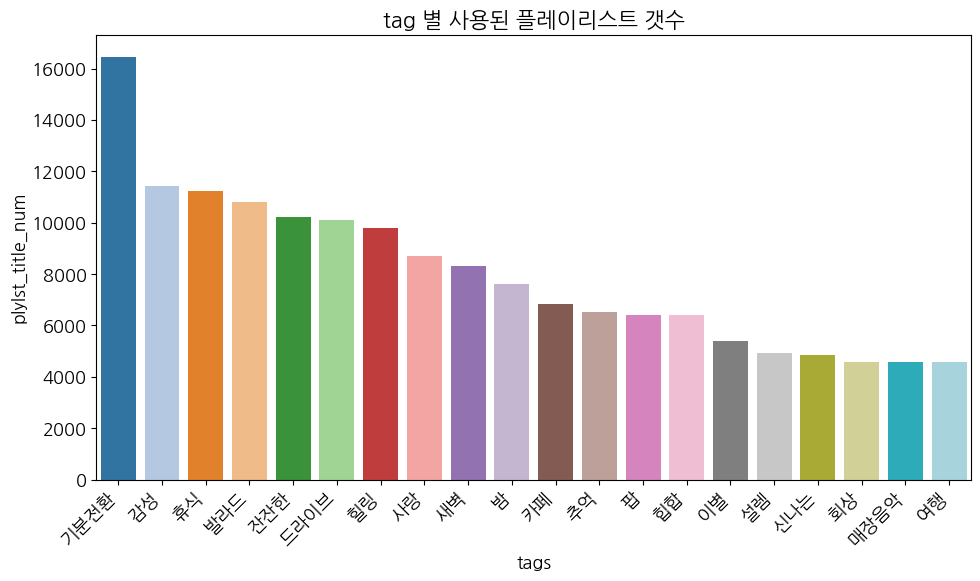

In [ ]:
color_palette = sns.color_palette('tab20', n_colors=20)

plt.figure(figsize=(10, 6))
sns.barplot(x='tags', y='plylst_title_num', data=tmp, palette=color_palette)
plt.xlabel('tags')
plt.ylabel('plylst_title_num')
plt.title('tag 별 사용된 플레이리스트 갯수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()